# Foundations of Data Science
## Homework 5: Algorithmic fairness

Student Name: Syed Ahmad 

***

### Part 1: Algorithmic fairness (15 points)


#### Data acquisition and preparation (4 points)

For this question we will use the "Adult" dataset from the UC Irvine repository.

This data is from the United States census, and we will examine the algorithmic fairness for an income prediction task. For more information about the dataset, see [Here](https://archive.ics.uci.edu/ml/datasets/adult).


1\. Download the data. (1 point)

Load data from the URL using the pandas read_csv method.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


2\. If the column headers are not correct, assign names to them (hint: use the readme from the source website). Compute descriptive statistics for the education level. (2 points).

In [3]:
columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income_bracket']
dataset.columns = columns

In [4]:
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Unique education values are:
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

Education column descriptive statistics:
count        32561
unique          16
top        HS-grad
freq         10501
Name: education, dtype: object
Null Values	0


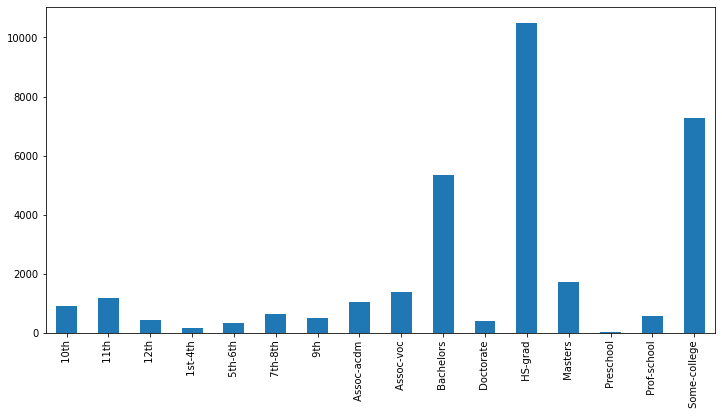

In [5]:
print(f"Unique education values are:\n {dataset.education.unique()} \n")
print(f"Education column descriptive statistics:\n{dataset.education.describe()}")
print(f"Null Values\t{len(dataset[dataset['education'].isnull()])}")
dataset['education'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

3\. Select one attribute as protected. Explain the reason why you selected this attribute. (1 point)

Protected attributes require the prefix protected. The outcome attribute requires the prefix target. For example, if you need to measure fairness rankings of a dataset with the columns sex and credit_score, rename the columns to protected_sex and target_credit_Score. Update the column names for our dataset (hint: you may also have to convert the target to a binary variable and create dummy variables for those that are categorical, for upcoming steps). (1 point).

In [6]:
#Place code here
def encode(val):
  if val == ' <=50K':
    return 0
  return 1

dataset['protected_sex'] = dataset['sex']
dataset['target_income_bracket'] = dataset['income_bracket'].apply(encode)
dataset.pop('income_bracket')
dataset.pop('sex')
dataset.head()

# NOTE: Encoding of other Categorical variables has been done below as part of Classification Pipeline 

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,protected_sex,target_income_bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,Male,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,Male,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,Male,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,Male,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,Female,0


I chose the columm "sex" as protected as I want to check fairness on this column to ensure the model we train performs fairly and equally on all genders.  In our case, we will consider Female gender as Unprivileged class and Male as Privileged as historically a lot of models are biased towards Male population vs others. 

#### Build a Classifier (5 points)

4\. Select a type of classifier to build for the income prediction task. Give reasoning for why you picked this type. (1 point)

I will be using DecisionTree to do this classification task, the reason being it is fast, easy to use, and easy to understand. It also requires less effort for data preparation during pre-processing such as normalization and scaling. 

5\. Split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function numpy but do not use the data splitting functions from Sklearn. (1 point)


In [7]:
# splitting into train and test sets
mask = np.random.rand(len(dataset)) < 0.8
train_df = dataset[mask]
test_df = dataset[~mask]
print(f"Dataset shape {dataset.shape}")
print(f"Train shape {train_df.shape}")
print(f"Test shape {test_df.shape}")

Dataset shape (32561, 15)
Train shape (26077, 15)
Test shape (6484, 15)


6\. On the training set, implement your classifier. Give reasoning for your choice of any hyperparameter(s). (1 point)

I am using hyperparameter max_depth with value 4. I am using a smaller value for max_depth to avoid overfitting as a tree with any larger depth may learn very specific rules from the training dataset. 

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X_train = train_df.copy()
y_train = X_train.pop('target_income_bracket') 
X_test = test_df.copy()
y_test = X_test.pop('target_income_bracket') 

# Impute and Scale Numerical columns
numeric_features = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler()), ("imputer", SimpleImputer())]
)

# Encode Categorical columns
categorical_features = ['workclass','education', 'marital-status','occupation','relationship','race','native-country','protected_sex']
categorical_transformer = OneHotEncoder(categories="auto", sparse=False)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)


In [9]:
from sklearn.metrics import accuracy_score

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", DecisionTreeClassifier(max_depth=4))]
)
clf = clf.fit(X_train, y_train)
y_pred_proba = clf.predict_proba(X_test)[:,1]
y_pred = clf.predict(X_test)
print(f'Accuracy on Test set: {accuracy_score(y_test, y_pred)}')

Accuracy on Test set: 0.8417643429981493


7\. To demonstrate the performance of your classifier, we will now plot the AUROC. Below are two functions which you can use. What you need to add is code to plot the AUROC for all the data and as well for each value of the protected attribute (on one set of axes). (2 points)

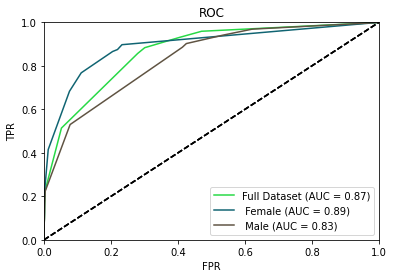

In [10]:
#Code for computing the AUCROC

from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt


def getAUC(truth, pred):
    fpr, tpr, thresholds = roc_curve(truth, pred)
    return auc(fpr, tpr)


def plotAUC(truth, pred, lab):
    fpr, tpr, thresholds = roc_curve(truth, pred)
    roc_auc = auc(fpr, tpr)
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color=c, label= lab+' (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")

#Add code below to subset rows by protected attribute
group_indices = X_test.groupby(by='protected_sex').indices
subsets = []
for group in group_indices:
  subsets.append([group, X_test.iloc[group_indices[group]], y_test.iloc[group_indices[group]]])

# Make predictions on each subset and store results
subsetResults = []
for subset in subsets:
    y_pred_slice = clf.predict_proba(subset[1])[:,1]
    subsetResults.append([subset[0],subset[2],y_pred_slice])

#Add code below to make the plot    
plotAUC(y_test,y_pred_proba,'Full Dataset')
# Plot AUC for each group
for subsetResult in subsetResults:
  plotAUC(subsetResult[1],subsetResult[2],subsetResult[0])


#### Assessing algorithmic fairness (5 points)

8\. Algorithmic Fairness metrics (2 points) 

Pick a fairness metric to apply to the income prediction task and your selected protected attribute. Explain why you selected this metric. 

I am considering positive class as being classfied as having income of >=50k. With this in mind, the metric I will be checking is Equal opportunity (true positive rate). 

Equal Opportunity (True Positive Rate) can be interpreted as the percentage of people who have rightfully benefitted from the model; which is a good metric in our case to make sure both Male and Female population are equally benefitting from the positive predictions i.e whether they are earning above 50k USD a year.

9\. Compute the chosen metric for your protected attribute. Hint: this will require you to first find the threshold wiith the best when predicting on the entire data, and then computing the TPR/FPR or other necessary parameters at that threshold for each value of the protected attribute. (2 points)

There are many ways we could locate the threshold with the optimal balance between the false positive rate (FPR) and true positive rate (TPR).

As a reminder, the TPR is called the Sensitivity. The inverse of the false-positive rate (1-FPR) is called the Specificity.

<center>Sensitivity = $\frac{TP}{TP + FN}$
Specificity = $\frac{TN}{FP + TN}$</center>

where:

<center>Sensitivity = TPR and Specificity = 1 – FPR</center>

The Geometric Mean or g-mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

<center>g-mean = $\sqrt{Sensitivity * Specificity}$ </center>



In [11]:
# Get probabilities from classifier trained above
y_pred_proba = clf.predict_proba(X_test)[:,1]

# calculate fpr and tpr values using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# calculate the g-mean for each threshold and find the best one
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
bestThreshold = thresholds[ix]
print('Best Threshold=%f, G-Mean=%.3f' % (bestThreshold, gmeans[ix]))

Best Threshold=0.322820, G-Mean=0.786


In [12]:
# calculate TPR on each group of the protected attribute 
subsetTPRs = dict()
for subset in subsets:
    y_pred_proba_slice = clf.predict_proba(subset[1])[:,1]
    fpr, tpr, thresholds = roc_curve(subset[2], y_pred_proba_slice)
    # Obtain TPR for this group at the index of best threshold(max g-mean) we found above
    subsetTPRs[subset[0]] = tpr[ix]

print(f"True Positive Rates for each group: {subsetTPRs}")

True Positive Rates for each group: {' Female': 0.8660714285714286, ' Male': 0.9024926686217009}


In [13]:
ratio = subsetTPRs[' Female']/subsetTPRs[' Male']
print(f"Ratio of TPR between Male and Female groups(Equal Opprtunity): {ratio}")

Ratio of TPR between Male and Female groups(Equal Opprtunity): 0.9596437275153766


10\. Is there a disparity? How can we interpret its magnitude? Is such a disparity a bad thing/avoidable? (1 point)

In an ideal case, the Ratio between unprivilaged class and privilaged class should be '1' and the TPR values for each group should be equal. 

In our case, the value TPR is slightly less for female population which indicates disparity and an adverse impact on the the 'Female' gender. Here, the 'Male' gender has  higher proportion of predicted positive outcomes than 'Female' gender. 

This is not good since it means the members of Female population are less likely to rightly benefit from the model predictions.

The bias or ratio here is not that much and can be avoided by paying attention to fairness throught the data life cycle. One way would be to train and optimize algorithms for fainess metrics and not just accuracy metrics.